# Seguro de automóveis da Suécia

## Definição do Problema

O dataset é composto por:
X = Número de reivindicações
Y = total pago por todas as reivindicações em mil coroas suecas.

link do dataset: https://www.kaggle.com/sunmarkil/auto-insurance-in-sweden-small-dataset/data

Atributo de predição: y

### Importação das bibliotecas

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn import ensemble
from sklearn import svm
from sklearn import tree
from sklearn import model_selection 

### Carregando e definindo as colunas do dataset

In [4]:
columns = ["X", "y"]
data = pd.read_csv('insurance.csv',names=columns, sep='\t')

### Visualização e descrição dos dados

In [5]:
data.head(10)

,X,y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
5,57,170.9
6,23,56.9
7,14,77.5
8,45,214.0
9,10,65.3


In [6]:
data.describe()

,X,y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


In [7]:
print(data.shape)

(63, 2)


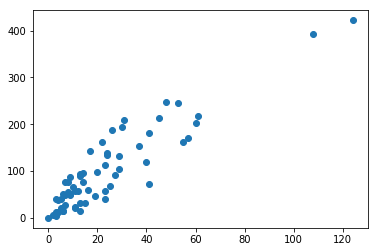

In [8]:
plt.scatter(data.values[:,0],data.values[:,1]);

In [9]:
data.corr()

,X,y
X,1.000000,0.912878
y,0.912878,1.000000


### Criação do dataset de validação 

In [10]:
dataset = data.values
print(dataset)

[[108.  392.5]
 [ 19.   46.2]
 [ 13.   15.7]
 [124.  422.2]
 [ 40.  119.4]
 [ 57.  170.9]
 [ 23.   56.9]
 [ 14.   77.5]
 [ 45.  214. ]
 [ 10.   65.3]
 [  5.   20.9]
 [ 48.  248.1]
 [ 11.   23.5]
 [ 23.   39.6]
 [  7.   48.8]
 [  2.    6.6]
 [ 24.  134.9]
 [  6.   50.9]
 [  3.    4.4]
 [ 23.  113. ]
 [  6.   14.8]
 [  9.   48.7]
 [  9.   52.1]
 [  3.   13.2]
 [ 29.  103.9]
 [  7.   77.5]
 [  4.   11.8]
 [ 20.   98.1]
 [  7.   27.9]
 [  4.   38.1]
 [  0.    0. ]
 [ 25.   69.2]
 [  6.   14.6]
 [  5.   40.3]
 [ 22.  161.5]
 [ 11.   57.2]
 [ 61.  217.6]
 [ 12.   58.1]
 [  4.   12.6]
 [ 16.   59.6]
 [ 13.   89.9]
 [ 60.  202.4]
 [ 41.  181.3]
 [ 37.  152.8]
 [ 55.  162.8]
 [ 41.   73.4]
 [ 11.   21.3]
 [ 27.   92.6]
 [  8.   76.1]
 [  3.   39.9]
 [ 17.  142.1]
 [ 13.   93. ]
 [ 13.   31.9]
 [ 15.   32.1]
 [  8.   55.6]
 [ 29.  133.3]
 [ 30.  194.5]
 [ 24.  137.9]
 [  9.   87.4]
 [ 31.  209.8]
 [ 14.   95.5]
 [ 53.  244.6]
 [ 26.  187.5]]


In [11]:
np.random.seed(1)
np.random.shuffle(dataset)
dataset

array([[ 29. , 103.9],
       [ 16. ,  59.6],
       [ 13. ,  93. ],
       [ 20. ,  98.1],
       [ 53. , 244.6],
       [ 13. ,  15.7],
       [  9. ,  48.7],
       [ 41. , 181.3],
       [ 60. , 202.4],
       [ 55. , 162.8],
       [  4. ,  12.6],
       [ 15. ,  32.1],
       [ 11. ,  57.2],
       [  4. ,  11.8],
       [ 30. , 194.5],
       [  8. ,  76.1],
       [124. , 422.2],
       [ 13. ,  89.9],
       [ 61. , 217.6],
       [  5. ,  20.9],
       [ 29. , 133.3],
       [ 23. , 113. ],
       [ 22. , 161.5],
       [ 31. , 209.8],
       [  6. ,  50.9],
       [  8. ,  55.6],
       [ 13. ,  31.9],
       [ 27. ,  92.6],
       [  5. ,  40.3],
       [ 17. , 142.1],
       [ 25. ,  69.2],
       [  9. ,  87.4],
       [ 23. ,  39.6],
       [  9. ,  52.1],
       [  6. ,  14.6],
       [  0. ,   0. ],
       [  3. ,  39.9],
       [  3. ,  13.2],
       [ 40. , 119.4],
       [  7. ,  48.8],
       [  4. ,  38.1],
       [  7. ,  27.9],
       [ 24. , 137.9],
       [ 11

In [12]:
X = dataset[:,0]
X.shape

(63,)

In [13]:
X = X.reshape((X.shape[0], 1))
y = dataset[:,1]

In [14]:
X.shape, y.shape

((63, 1), (63,))

In [15]:
n_train = int(round(len(y) * 0.67))
X_train = X[:n_train,:]
y_train = y[:n_train]

X_test = X[n_train:,:]
y_test = y[n_train:]


In [16]:
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((63, 1), (63,), (42, 1), (42,), (21, 1), (21,))

In [17]:
# fazer o split usando a API do scikit. comparar com o que foi feito acima.
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((63, 1), (63,), (42, 1), (42,), (21, 1), (21,))

### Criação dos modelos

#### Classificadores utilizados:

- Linear Regression
- Linear SVR
- SVR - Epsilon-Support Vector Regression
- Random Forest Regressor
- Gradient Boosting Regressor
- Extra Tree Regressor

In [18]:
resultados = {}
resultados['LR'] = { 'model': linear_model.LinearRegression() }
resultados['LSVR'] = { 'model': svm.LinearSVR() }
resultados['SVR'] = { 'model': svm.SVR(kernel='linear') }
resultados['RFR'] = { 'model': ensemble.RandomForestRegressor() }
resultados['GBR'] = {'model': ensemble.GradientBoostingRegressor()}
resultados['ETR'] = {'model': tree.ExtraTreeRegressor()}

In [19]:
for key in resultados:
    print('processando {}...'.format(key))
    resultados[key]['model'].fit(X_train, y_train)
    resultados[key]['y_pred'] = resultados[key]['model'].predict(X_test)
    resultados[key]['mse'] = metrics.mean_squared_error(y_test, resultados[key]['y_pred'])
    resultados[key]['rmse'] = np.sqrt(resultados[key]['mse'])
    resultados[key]['mae'] = metrics.mean_absolute_error(y_test, resultados[key]['y_pred'])

processando LR...
processando LSVR...
processando SVR...
processando RFR...
processando GBR...
processando ETR...


/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [20]:
df = pd.DataFrame(resultados)
df.T[['y_pred','mse','rmse','mae']]

,y_pred,mse,rmse,mae
ETR,"[119.4, 244.6, 133.3, 65.3, 62.45, 8.8, 392.5,...",1367.45,36.9791,28.4524
GBR,"[125.86316834649556, 213.0678133445654, 134.43...",1586.5,39.8308,31.9832
LR,"[155.76715889936136, 195.11261366064434, 127.1...",1454.54,38.1385,29.6592
LSVR,"[164.0959571938169, 211.40707491082048, 129.68...",2167.88,46.5604,34.4189
RFR,"[142.21000000000004, 213.36999999999998, 163.9...",2091.27,45.7304,34.5904
SVR,"[150.84851485148494, 188.30297029703007, 123.6...",1288.85,35.9006,27.7164


In [25]:
df_T = df.transpose()
df_T = df_T[ ['rmse','mae'] ]
df_T

,rmse,mae
ETR,36.9791,28.4524
GBR,39.8308,31.9832
LR,38.1385,29.6592
LSVR,46.5604,34.4189
RFR,45.7304,34.5904
SVR,35.9006,27.7164


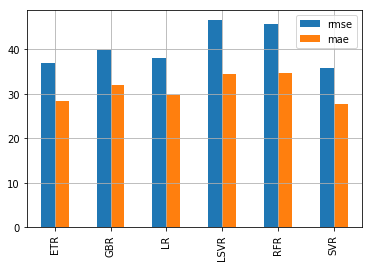

In [26]:
df_T.plot(kind='bar', grid=True);

In [27]:
modelo_final = svm.SVR(kernel='linear')
modelo_final.fit(X,y);